# UAS Data Mining

### Kelompok 4
### Anggota Kelompok
- Muhammad Nandaarjuna Fadhillah (2109106028)
- Ardi Setyiawan (2109106035)
- Rafi izdhihaar (2109106053)


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Membaca, Melihat, dan Menghapus kolom yang tidak diperlukan dalam Dataset

In [2]:
df = pd.read_excel('Harga_Pangan_Indo.xlsx')
df.drop('No', axis=1, inplace=True)
df.head()

,Komoditas (Rp),01/ 01/ 2021,04/ 01/ 2021,05/ 01/ 2021,06/ 01/ 2021,07/ 01/ 2021,08/ 01/ 2021,11/ 01/ 2021,12/ 01/ 2021,13/ 01/ 2021,...,18/ 09/ 2023,19/ 09/ 2023,20/ 09/ 2023,21/ 09/ 2023,22/ 09/ 2023,25/ 09/ 2023,26/ 09/ 2023,27/ 09/ 2023,28/ 09/ 2023,29/ 09/ 2023
0,Beras,-,"11,800","11,800","11,800","11,800","11,800","11,800","11,800","11,800",...,"14,200","14,250","14,250","14,250","14,300","14,350","14,350","14,350","14,400","14,400"
1,Daging Ayam,-,"36,050","36,000","36,100","36,150","35,800","35,700","35,700","35,600",...,"35,250","35,200","35,200","35,150","35,100","35,550","35,700","35,650","36,400","35,550"
2,Daging Sapi,-,"118,750","119,300","119,400","119,400","119,450","119,350","119,300","119,250",...,"134,900","134,900","134,900","134,950","134,850","134,900","134,950","134,950","134,850","134,900"


## Mengubah struktur dataframe

In [3]:
#transpose dataset untuk membuat kolom date
df_transposed = df.T

# reset index setelah buat kolom date
df_transposed.reset_index(inplace=True)

# rename kolom untuk remove 'Komoditas (Rp) 
df_transposed.columns = df_transposed.iloc[0]

# Drop baris pertama
df_transposed = df_transposed.drop(0)

# Reset the index
df_transposed.reset_index(drop=True, inplace=True)

df_transposed = df_transposed.rename(columns={'Komoditas (Rp)': 'date'})

# display dataframe
df_transposed.head()



,date,Beras,Daging Ayam,Daging Sapi
0,01/ 01/ 2021,-,-,-
1,04/ 01/ 2021,"11,800","36,050","118,750"
2,05/ 01/ 2021,"11,800","36,000","119,300"
3,06/ 01/ 2021,"11,800","36,100","119,400"
4,07/ 01/ 2021,"11,800","36,150","119,400"


In [4]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         716 non-null    object
 1   Beras        716 non-null    object
 2   Daging Ayam  716 non-null    object
 3   Daging Sapi  716 non-null    object
dtypes: object(4)
memory usage: 22.5+ KB


## Mengatasi Missing Value

In [5]:
df_transposed = df_transposed.replace('-', 0)
print(df_transposed.info())
df_transposed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         716 non-null    object
 1   Beras        716 non-null    object
 2   Daging Ayam  716 non-null    object
 3   Daging Sapi  716 non-null    object
dtypes: object(4)
memory usage: 22.5+ KB
None


,date,Beras,Daging Ayam,Daging Sapi
0,01/ 01/ 2021,0,0,0
1,04/ 01/ 2021,"11,800","36,050","118,750"
2,05/ 01/ 2021,"11,800","36,000","119,300"
3,06/ 01/ 2021,"11,800","36,100","119,400"
4,07/ 01/ 2021,"11,800","36,150","119,400"


In [6]:
df_transposed['Beras'] = df_transposed['Beras'].str.replace(',', '').astype(float)
df_transposed.info()
df_transposed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         716 non-null    object 
 1   Beras        706 non-null    float64
 2   Daging Ayam  716 non-null    object 
 3   Daging Sapi  716 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.5+ KB


,date,Beras,Daging Ayam,Daging Sapi
0,01/ 01/ 2021,NaN,0,0
1,04/ 01/ 2021,11800.0,"36,050","118,750"
2,05/ 01/ 2021,11800.0,"36,000","119,300"
3,06/ 01/ 2021,11800.0,"36,100","119,400"
4,07/ 01/ 2021,11800.0,"36,150","119,400"


## Mengubah tipe data tanggal, Ekstrasi dan data splitting

In [47]:
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d/ %m/ %Y')
df_transposed['tahun'] = df_transposed['date'].dt.year
df_transposed['bulan'] = df_transposed['date'].dt.month
df_transposed['tanggal'] = df_transposed['date'].dt.day
df_transposed['dayOfyear'] = df_transposed['date'].dt.dayofyear

In [8]:
df_transposed = df_transposed[['date','dayOfyear','tanggal','bulan','tahun','Beras']]
df_transposed.info()
df_transposed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       716 non-null    datetime64[ns]
 1   dayOfyear  716 non-null    int32         
 2   tanggal    716 non-null    int32         
 3   bulan      716 non-null    int32         
 4   tahun      716 non-null    int32         
 5   Beras      706 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 22.5 KB


,date,dayOfyear,tanggal,bulan,tahun,Beras
0,2021-01-01,1,1,1,2021,NaN
1,2021-01-04,4,4,1,2021,11800.0
2,2021-01-05,5,5,1,2021,11800.0
3,2021-01-06,6,6,1,2021,11800.0
4,2021-01-07,7,7,1,2021,11800.0


## Mengisi nilai null dengan rata2 harga beras

In [9]:
mean_beras = int(df_transposed['Beras'].mean())
df_clean = df_transposed.fillna(mean_beras)
df_clean

,date,dayOfyear,tanggal,bulan,tahun,Beras
0,2021-01-01,1,1,1,2021,12292.0
1,2021-01-04,4,4,1,2021,11800.0
2,2021-01-05,5,5,1,2021,11800.0
3,2021-01-06,6,6,1,2021,11800.0
4,2021-01-07,7,7,1,2021,11800.0
...,...,...,...,...,...,...
711,2023-09-25,268,25,9,2023,14350.0
712,2023-09-26,269,26,9,2023,14350.0
713,2023-09-27,270,27,9,2023,14350.0
714,2023-09-28,271,28,9,2023,14400.0


## Visualisasi data beras sebelum di prediksi

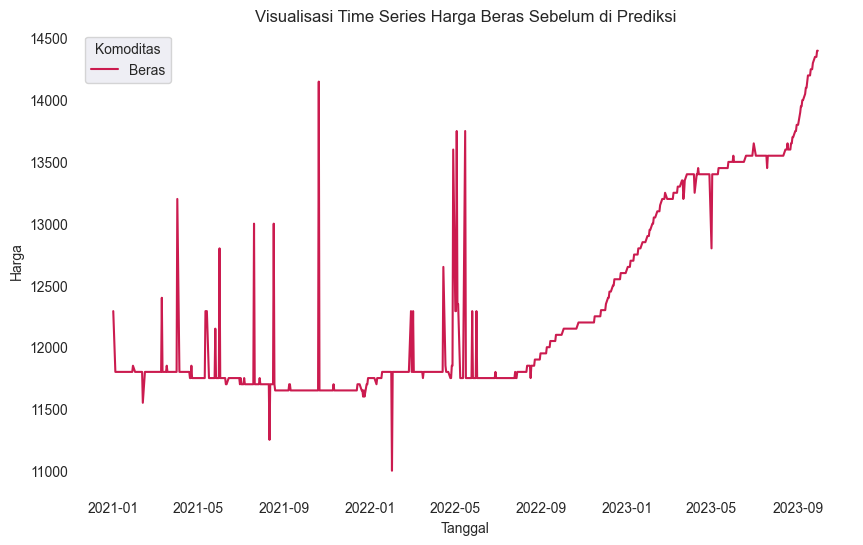

In [40]:
# Melt DataFrame untuk merubah data menjadi format long
df_melted = df_clean.melt(id_vars=['date'], value_vars=['Beras'],
                     var_name='Komoditas', value_name='Harga')


# Plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("dark")
ax = sns.lineplot(
    data=df_melted, 
    x='date', 
    y='Harga', 
    hue='Komoditas',
    palette="rocket",
)
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Visualisasi Time Series Harga Beras Sebelum di Prediksi')
plt.legend(title='Komoditas')
plt.grid(True)
ax.set_facecolor('white')
ax.figure.set_facecolor('white')
plt.show()

## Pre Processing dengan membuat variabel dependen dan independen

In [10]:
X = df_clean[["tahun", "bulan", "tanggal", "dayOfyear"]]
y = df_clean["Beras"]

### Memisahkan data menjadi data Train dan Test 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Model Naive Bayes

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Evaluasi Model

In [13]:
prediksi = model.predict(X_test)
accuracy = (prediksi == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


### Prediksi Harga Beras 30 Hari Kedepan

In [26]:
future_date = pd.date_range(start=df_clean["date"].max(), periods=30, freq='D')
future_date

DatetimeIndex(['2023-09-29', '2023-09-30', '2023-10-01', '2023-10-02',
               '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06',
               '2023-10-07', '2023-10-08', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-14',
               '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-28'],
              dtype='datetime64[ns]', freq='D')

In [33]:
future_data = pd.DataFrame({
    "date" : future_date,
    "tahun" : future_date.year,
    "bulan" : future_date.month,
    "tanggal" : future_date.day,
    "dayOfyear" : future_date.dayofyear
})
future_data.head()

,date,tahun,bulan,tanggal,dayOfyear
0,2023-09-29,2023,9,29,272
1,2023-09-30,2023,9,30,273
2,2023-10-01,2023,10,1,274
3,2023-10-02,2023,10,2,275
4,2023-10-03,2023,10,3,276


In [34]:
prediksi = model.predict(future_data[["tahun","bulan","tanggal","dayOfyear"]])
prediksi

array([14400., 14400., 13750., 13600., 13600., 13600., 13600., 13600.,
       13600., 14150., 14150., 14150., 14150., 14150., 14150., 14150.,
       14150., 14150., 14150., 14150., 14150., 14150., 14150., 14150.,
       14150., 14150., 13650., 13650., 13650., 13650.])

In [35]:
future_data["Prediksi Harga beras"] = prediksi
future_data

,date,tahun,bulan,tanggal,dayOfyear,Prediksi Harga beras
0,2023-09-29,2023,9,29,272,14400.0
1,2023-09-30,2023,9,30,273,14400.0
2,2023-10-01,2023,10,1,274,13750.0
3,2023-10-02,2023,10,2,275,13600.0
4,2023-10-03,2023,10,3,276,13600.0
5,2023-10-04,2023,10,4,277,13600.0
6,2023-10-05,2023,10,5,278,13600.0
7,2023-10-06,2023,10,6,279,13600.0
8,2023-10-07,2023,10,7,280,13600.0
9,2023-10-08,2023,10,8,281,14150.0


### Visualisasi Data harga beras yang sudah di Prediksi

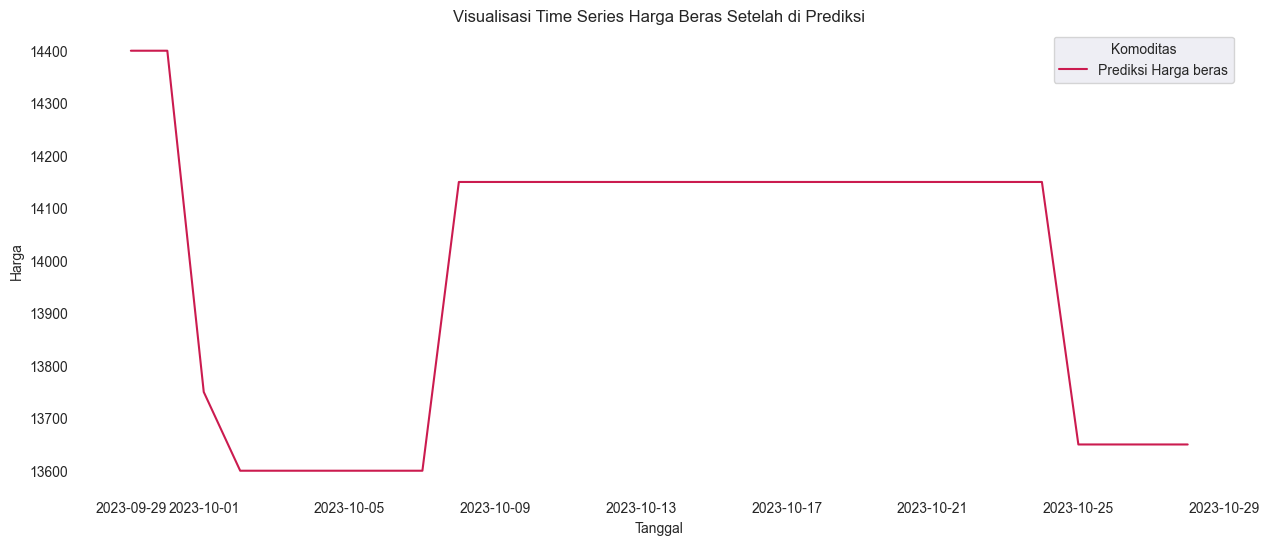

In [43]:
# Melt DataFrame untuk merubah data menjadi format long
df_future = future_data.melt(id_vars=['date'], value_vars=['Prediksi Harga beras'],
                     var_name='Komoditas', value_name='Harga')


# Plot menggunakan Seaborn
plt.figure(figsize=(15, 6))
sns.set_style("dark")
ax = sns.lineplot(
    data=df_future, 
    x='date', 
    y='Harga', 
    hue='Komoditas',
    palette="rocket"
)
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Visualisasi Time Series Harga Beras Setelah di Prediksi')
plt.legend(title='Komoditas')
plt.grid(True)
ax.set_facecolor('white')
ax.figure.set_facecolor('white')
plt.show()

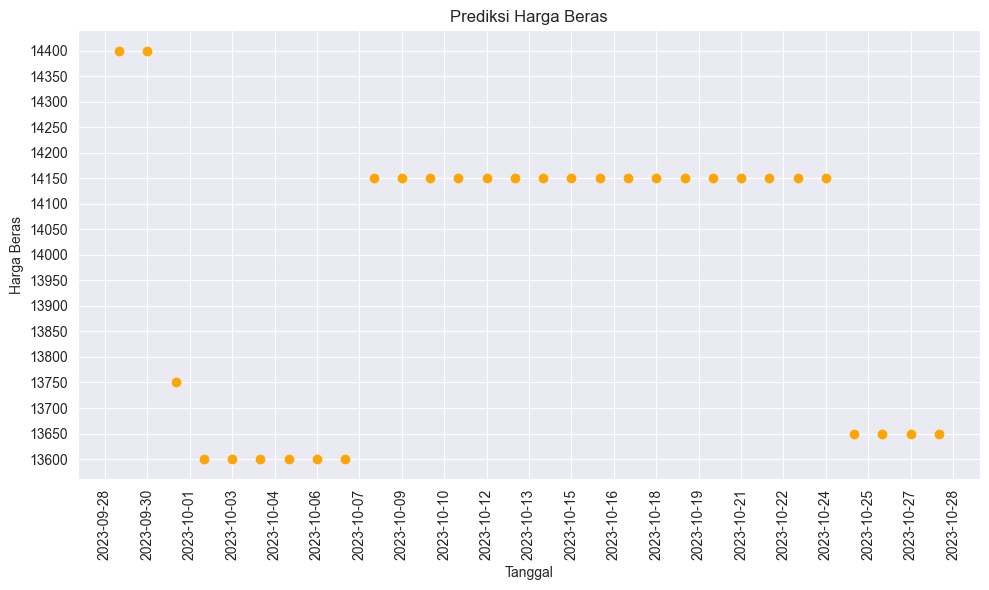

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(future_data['date'],future_data['Prediksi Harga beras'], color='Orange')


plt.title('Prediksi Harga Beras')
plt.xlabel('Tanggal') 
plt.ylabel('Harga Beras') 

plt.xticks(rotation=90) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30)) 

# Mengatur Skala interval pada sumbu y
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.tight_layout() 

plt.grid(True)
plt.show()

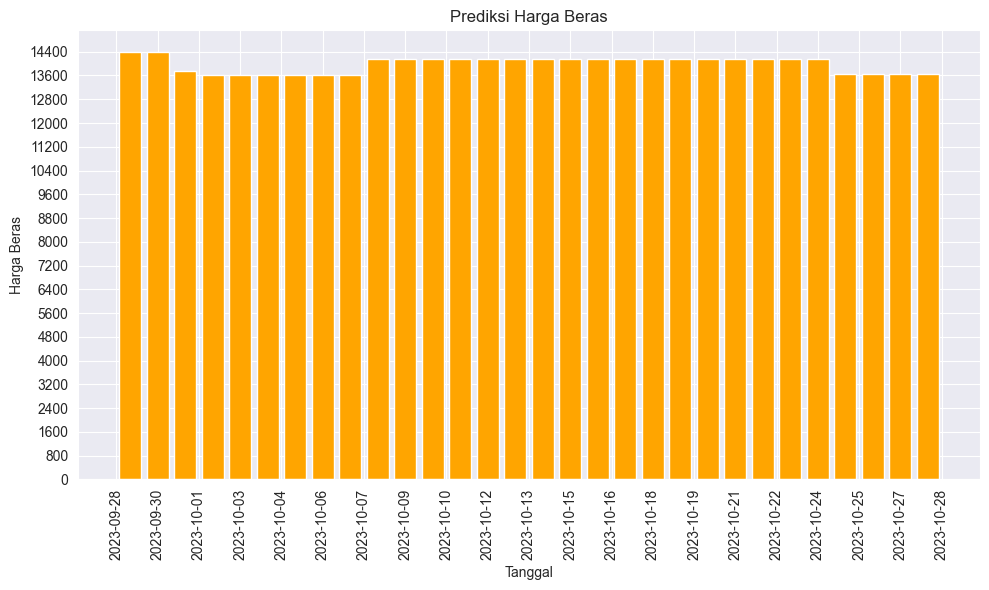

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(future_data['date'], future_data['Prediksi Harga beras'], color='Orange')

plt.title('Prediksi Harga Beras')
plt.xlabel('Tanggal') 
plt.ylabel('Harga Beras') 

plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

# Mengatur Skala interval pada sumbu y
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20))
plt.tight_layout()

plt.grid(True)
plt.show()

## Menyimpan hasil prediksi ke CSV

In [ ]:
future_data.to_csv('prediksi_beras_naive_bayes.csv')